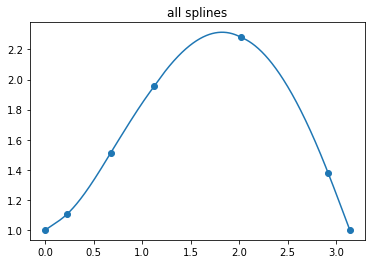

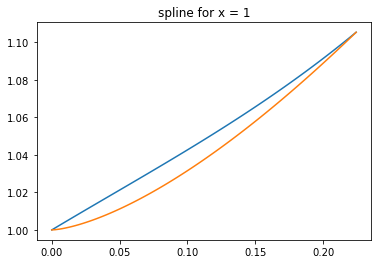

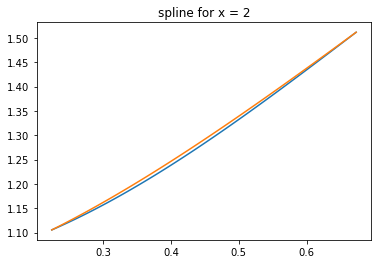

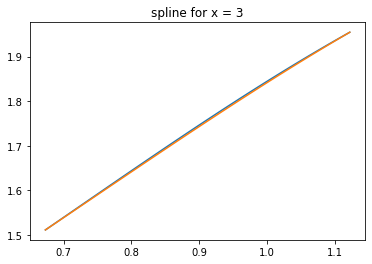

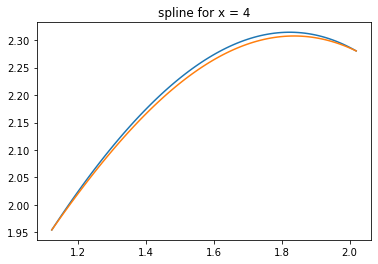

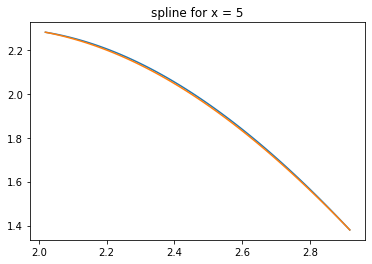

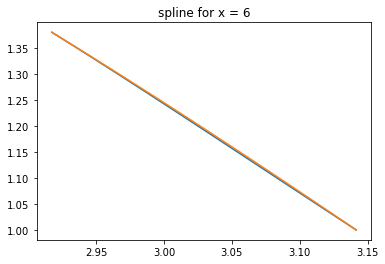

In [32]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

def cubic_interp1d(x0, x, y):
    x = np.asfarray(x)
    y = np.asfarray(y)
    
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

if __name__ == '__main__':
    mult = [0, 0.5, 1.5, 2.5, 4.5, 6.5, 7]
    x = [math.pi/7 * i for i in mult]
    f = lambda x : math.sin(x)*math.sqrt(x)+1
    y = [f(i) for i in x]
    plt.scatter(x, y)

    x_new = np.linspace(0, math.pi, 634)
    plt.plot(x_new, cubic_interp1d(x_new, x, y))
    plt.title("all splines")
    plt.show()
    
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i + 1], int(634 / len(x)))
        y_new = [f(j) for j in x_new]
        plt.plot(x_new, cubic_interp1d(x_new, x, y))
        plt.plot(x_new, y_new)
        plt.title("spline for x = {}".format(i + 1))
        plt.show()
    